# Genshin Impact

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from sklearn.metrics import mean_squared_error

np.random.seed(123)

## 1. Data Collection

### Bilibili Game Center

In [2]:
# Ratings from bilibili game center collected with our own scraper

# import requests
# import json
# import time
# from IPython.display import clear_output

# headers = {
#     'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
#     'user-agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.106 Safari/537.36',
# }
# def url(id, page):
#     return "https://line3-h5-pc-api.biligame.com/game/comment/page?game_base_id=" + str(id) + "&rank_type=2&page_num=" + str(page)

# id = 103496 # Genshin Impact
# response = requests.get(url = url(id, 1), headers = headers)
# result = json.loads(response.text)
# page_count = result["data"]["page_count"]
# df = pd.DataFrame(columns = ["name", "datetime", "content", "grade", "up", "down"])

# l = 1
# r = page_count
# while (l < r):
#     mid = int((l + r) / 2)
#     response = requests.get(url = url(id, mid), headers = headers)
#     result = json.loads(response.text)
#     if (result["data"]["list"][0]["publish_time"] < "2020-09-15 10:00:00"):
#         r = mid
#     elif (result["data"]["list"][-1]["publish_time"] > "2020-09-15 10:00:00"):
#         l = mid
#     else:
#         break
# page = mid

# start = time.time()
# page_end = page
# for page in range(page_end, 0, -1):
#     response = requests.get(url = url(id, page), headers = headers)
#     result = json.loads(response.text)
#     for reply in result["data"]["list"]:
#         df = pd.concat([df, pd.DataFrame({
#             "name": [reply["user_name"]],
#             "datetime": [reply["publish_time"]], 
#             "content": [reply["content"]], 
#             "grade": [reply["grade"]],
#             "up": [reply["up_count"]],
#             "down": [reply["down_count"]]
#         })])
#     clear_output()
#     t = time.time() - start
#     print("{:0>2}:{:0>2}:{:05.2f}".format(int(t // 3600), int((t % 3600) // 60), t % 60))
#     print(str(df.shape[0]) + "/" + str(mid * 10) + ", currently on page " + str(page))
# df.to_csv("bilibili_game_center.csv")

### Google Play 

In [3]:
# Ratings from google play collected with the scraper from a package
# https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/
# https://pypi.org/project/google-play-scraper/

# from google_play_scraper import app
# from google_play_scraper import Sort, reviews_all

# reviews = []
# for i in range(5):
#     reviews += reviews_all(
#         "com.miHoYo.GenshinImpact", 
#         sleep_milliseconds = 0,
#         lang = "en",
#         country = "us",
#         sort = Sort.NEWEST,
#         filter_score_with = i + 1
#     )
# df = pd.DataFrame(np.array(reviews), columns = ["review"])
# df = df.join(pd.DataFrame(df.pop("review").tolist()))
# df = df[["userName", "at", "content", "score", "thumbsUpCount"]]
# df.rename({"userName": "name", "at": "datetime", "score": "grade", "thumbsUpCount": "up"}, axis = 1, inplace = True)
# df.to_csv("google_play.csv")

## 2. Data Preparation

### Bilibili Game Center

In [4]:
df_bilibili = pd.read_csv("bilibili_game_center.csv")
df_bilibili["grade"] = df_bilibili["grade"].div(2)
df_bilibili = df_bilibili[df_bilibili["datetime"] >= "2020-09-28 10:00:00"]
df_bilibili.sort_values(by = ["datetime"], inplace = True)
df_bilibili["datetime"] = pd.to_datetime(df_bilibili["datetime"], format = "%Y-%m-%d %H:%M:%S").dt.date
df_bilibili.drop_duplicates(keep = "first", inplace = True)
df_bilibili.reset_index(inplace = True)
df_bilibili.drop(["Unnamed: 0", "index"], axis = 1, inplace = True)
print(df_bilibili.shape)
df_bilibili.head()

(234571, 6)


,name,datetime,content,grade,up,down
0,是him_,2020-09-28,穿着rng队服的我，拿着p40pro满怀泪水的给国产之光点了赞,1.0,2.0,1.0
1,梦醒依别,2020-09-28,k20p战败，中画质10分钟烫的快抓不住了。,3.0,0.0,0.0
2,倔强的粉色,2020-09-28,不是吧啊ser直接锁30帧?,3.0,2.0,0.0
3,道路不同罢了,2020-09-28,我不知道，是我手机问题么，崩三至少玩的很流畅，这游戏卡的让人无语，就算是最低画质都卡,1.0,0.0,0.0
4,嘲风CF,2020-09-28,剧情的那几个角色，他们存在意义在哪里啊，感觉好废,1.0,1.0,0.0


In [5]:
df_bilibili_ratings = df_bilibili[["datetime", "grade"]].groupby(["datetime"]).mean()

### Google Play

In [6]:
df_google = pd.read_csv("google_play.csv")
df_google = df_google[df_google["datetime"] >= "2020-09-28 10:00:00"]
df_google.sort_values(by = ["datetime"], inplace = True)
df_google["datetime"] = pd.to_datetime(df_google["datetime"], format = "%Y-%m-%d %H:%M:%S").dt.date
df_google.drop_duplicates(keep = "first", inplace = True)
df_google.reset_index(inplace = True)
df_google.drop(["Unnamed: 0", "index"], axis = 1, inplace = True)
print(df_google.shape)
df_google.head()

(328762, 5)


,name,datetime,content,grade,up
0,M Fadillah,2020-09-28,The hype is real on this but I'm honestly bore...,3,0
1,christian Torrefiel,2020-09-28,good game for me,5,0
2,Harry De la Cruz,2020-09-28,DEFINITELY ONE OF THE BEST ONLINE GAME SO FAR!...,5,0
3,Run On Sight,2020-09-28,"The game is so beautiful and so detailed,excep...",4,0
4,Basch Barrage,2020-09-28,the best game on mobile! but I wish they put f...,5,0


In [7]:
df_google_ratings = df_google[["datetime", "grade"]].groupby(["datetime"]).mean()

## 3. ARIMA

In [8]:
import pmdarima as pm
from statsmodels.tsa.arima_model import ARIMA

In [9]:
def train_ARIMA(df, name, pred_days = 60):
    split_point = df.shape[0] - pred_days
    ratings = np.array(df["grade"][:split_point])
    model = pm.auto_arima(ratings, 
                          start_p = 1, 
                          start_q = 1, 
                          information_criterion = 'aic', 
                          test = 'adf', 
                          max_p = 3, 
                          max_q = 3, 
                          trace = True)
    
    fc, confint = model.predict(n_periods = pred_days, return_conf_int = True)
    index_of_fc = np.arange(len(ratings), len(ratings) + pred_days)
    fc_series = pd.Series(fc, index = index_of_fc)
    lower_series = pd.Series(confint[:, 0], index = index_of_fc)
    upper_series = pd.Series(confint[:, 1], index = index_of_fc)
    
    # Fitting Plot
    fig, ax = plt.subplots(figsize = (32, 18))
    model = ARIMA(ratings, order = model.get_params()["order"])
    model_fit = model.fit(disp = 0)
    model_fit.plot_predict(dynamic = False, ax = ax)
    
    plt.title("Daily Average Rating in " + name + " and ARIMA Interpolation", fontsize = 32)
    plt.xlabel("Number of Days Since Initial Release Date", fontsize = 22)
    plt.ylabel("Daily Average Rating", fontsize = 22)
    plt.xticks(np.arange(0, 480, 30))
    plt.grid()
    plt.legend(fontsize = 18)
    
    # Prediction Plot
    plt.figure(figsize = (32, 18))
    plt.rcParams.update({'font.size': 12})

    plt.plot(ratings, color = "blue", label = "training")
    plt.plot(fc_series, color = "red", label = "forecast")
    plt.plot(range(df.shape[0])[split_point:], np.array(df["grade"][split_point:]), color = "green", label = "test")
    plt.fill_between(lower_series.index, lower_series, upper_series, color = "k", alpha = 0.15)
    plt.axvline(x = split_point, color = "black", linestyle = "--")

    plt.title("Daily Average Rating in " + name + " and ARIMA Extrapolation", fontsize = 32)
    plt.xlabel("Number of Days Since Initial Release Date", fontsize = 22)
    plt.ylabel("Daily Average Rating", fontsize = 22)
    plt.xticks(np.arange(0, 540, 30))
    plt.grid()
    plt.legend(fontsize = 18)
    
    print("MSE = ", mean_squared_error(np.array(fc_series), np.array(df["grade"][split_point:])))

### Bilibili Game Center 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=117.532, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=126.177, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=125.839, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=125.242, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=124.246, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=116.952, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=124.358, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=118.884, Time=0.20 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=116.963, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=123.619, Time=0.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=119.031, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=115.175, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=113.540, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=123.329, 

/Users/bill/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/bill/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmod

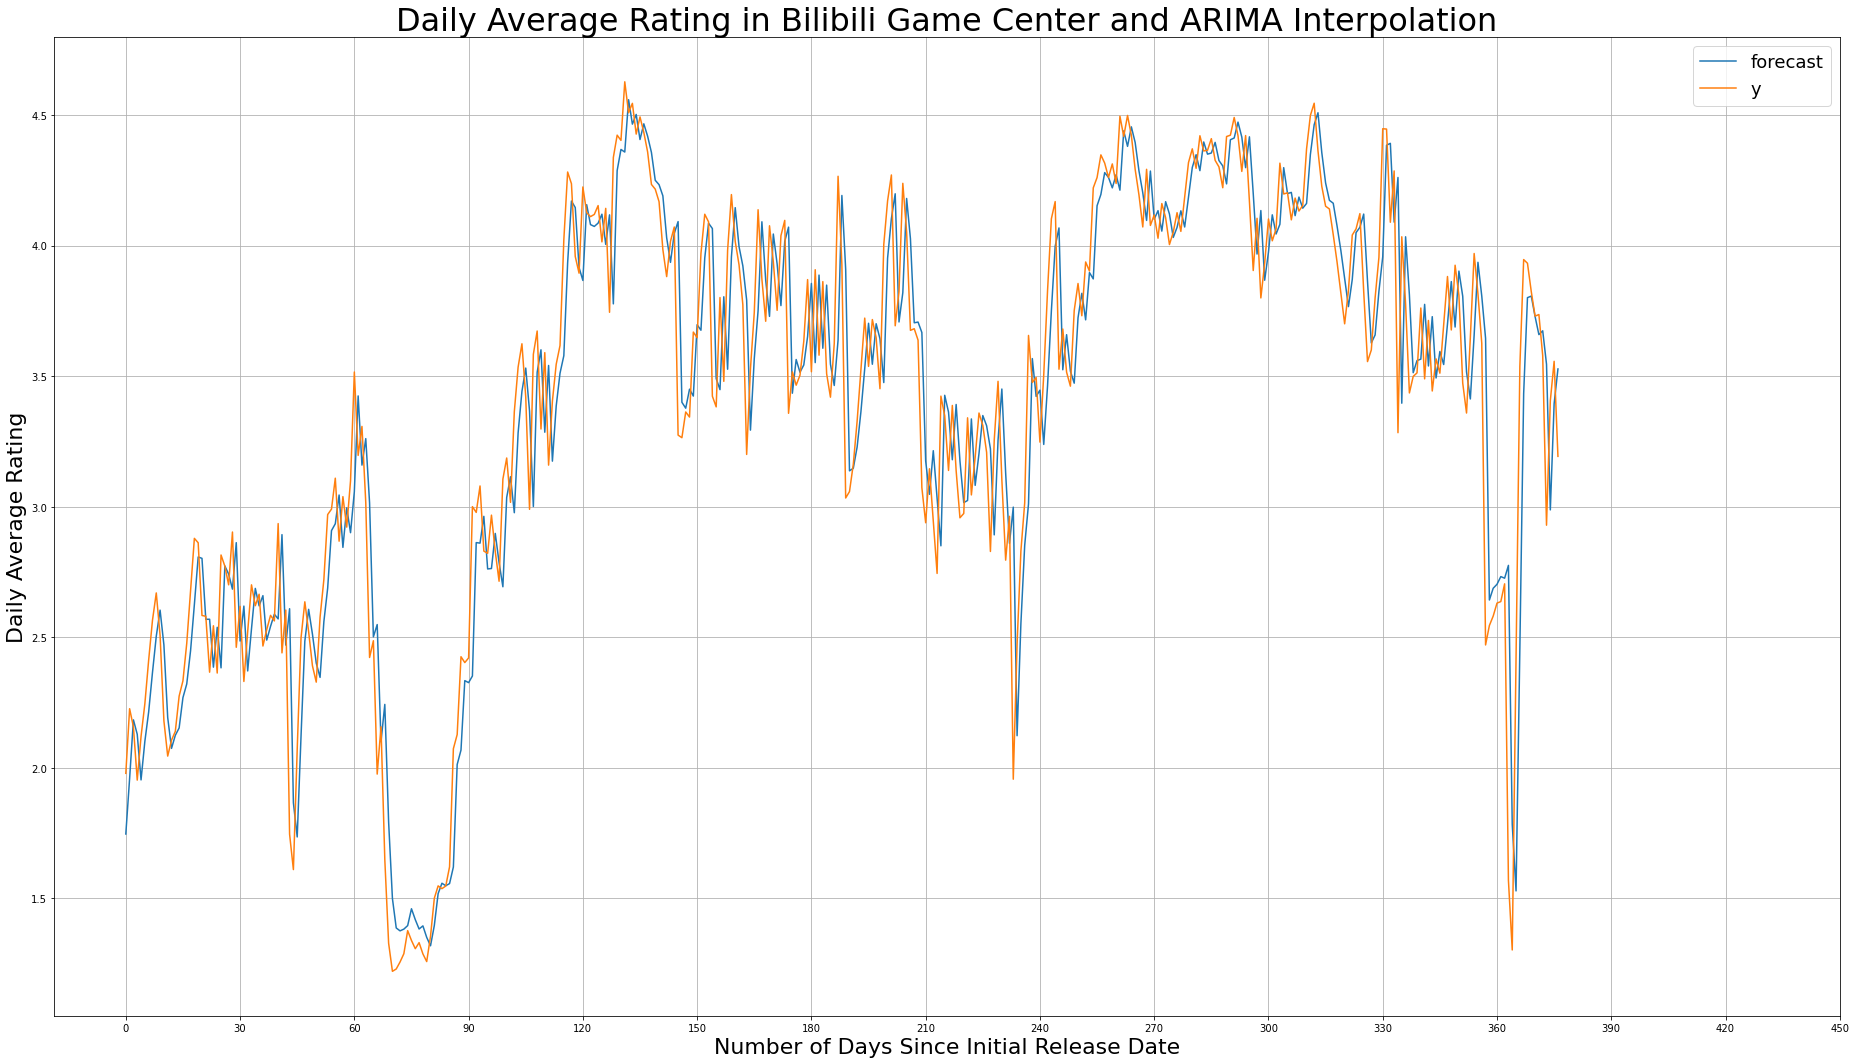

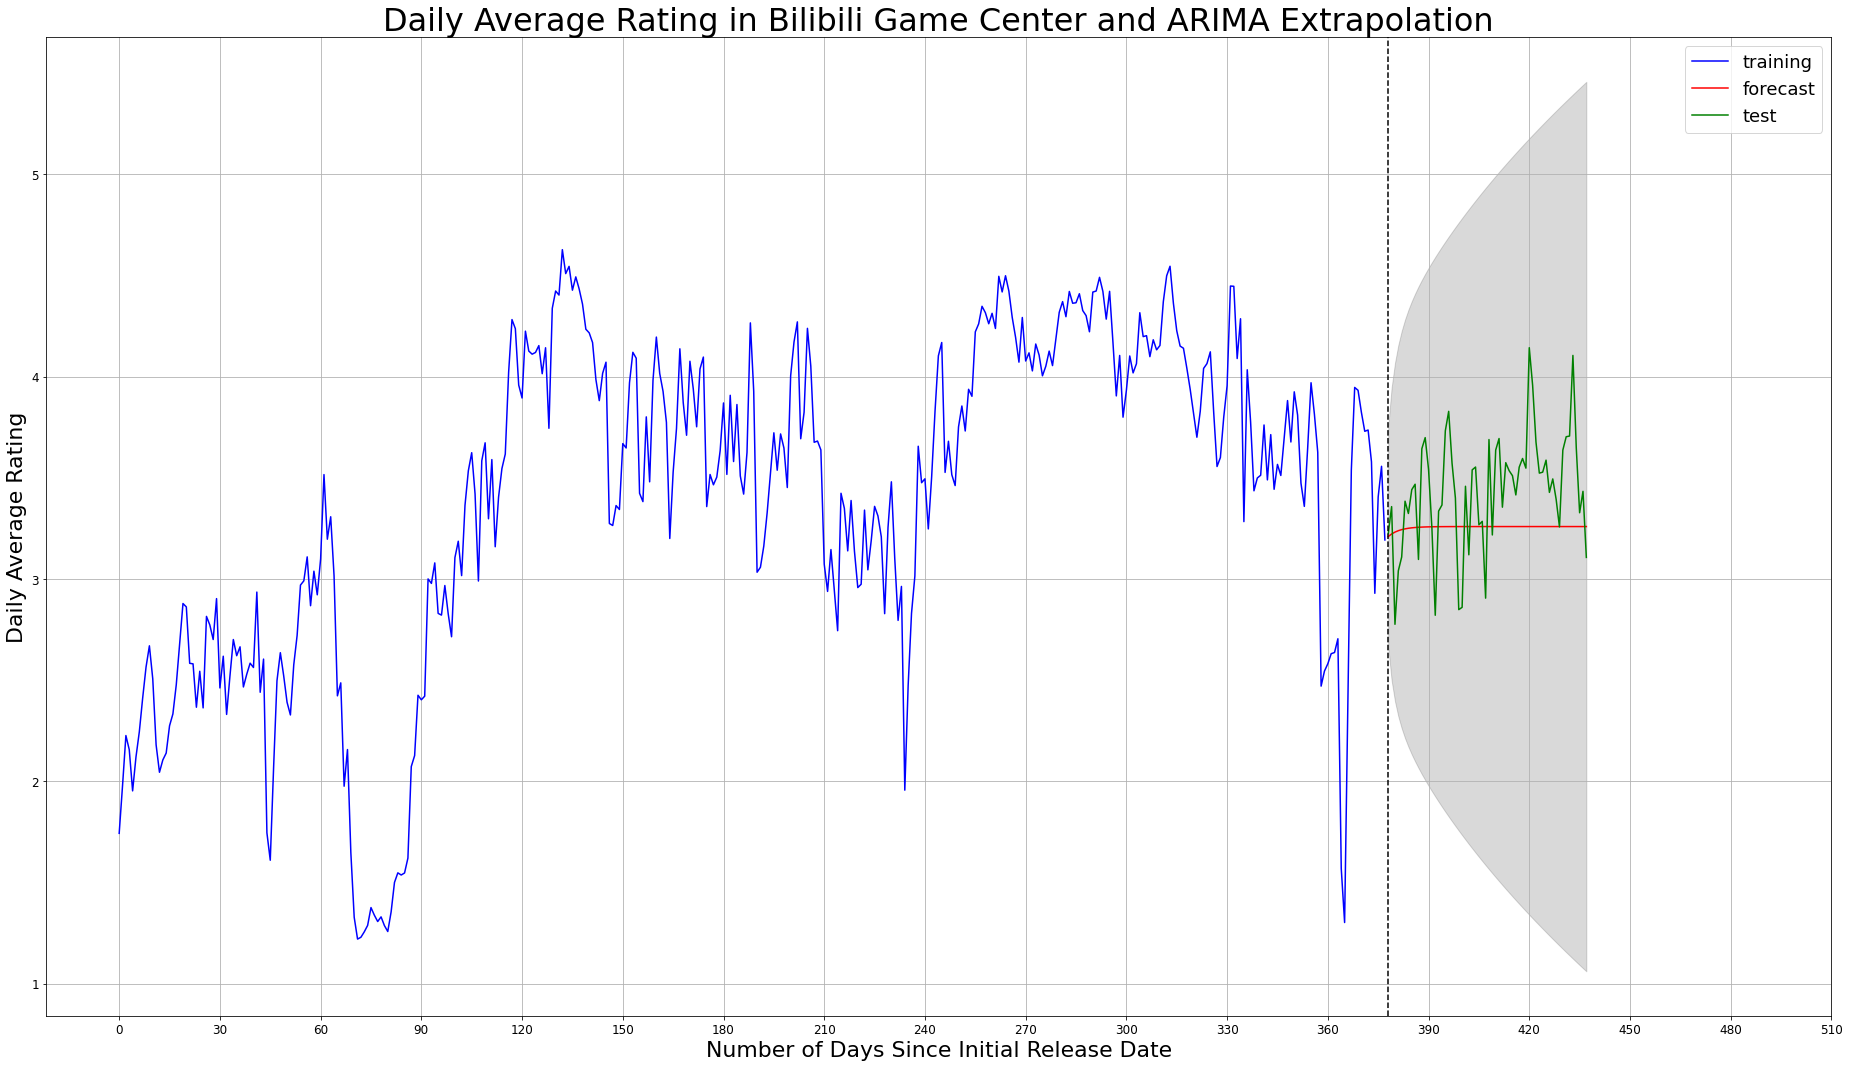

In [10]:
train_ARIMA(df_bilibili_ratings, "Bilibili Game Center")

### Google Play

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-229.317, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=92.104, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-214.803, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-103.360, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2173.071, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-241.659, Time=0.31 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-219.627, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-241.550, Time=0.35 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-245.459, Time=0.37 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-247.924, Time=0.30 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-143.029, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-246.207, Time=0.36 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-172.661, Time=0.11 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-244.584, Time=0.39 sec
 ARIMA(1,0,2)(0,0,0)[0]            

/Users/bill/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


MSE =  0.13669744046613408


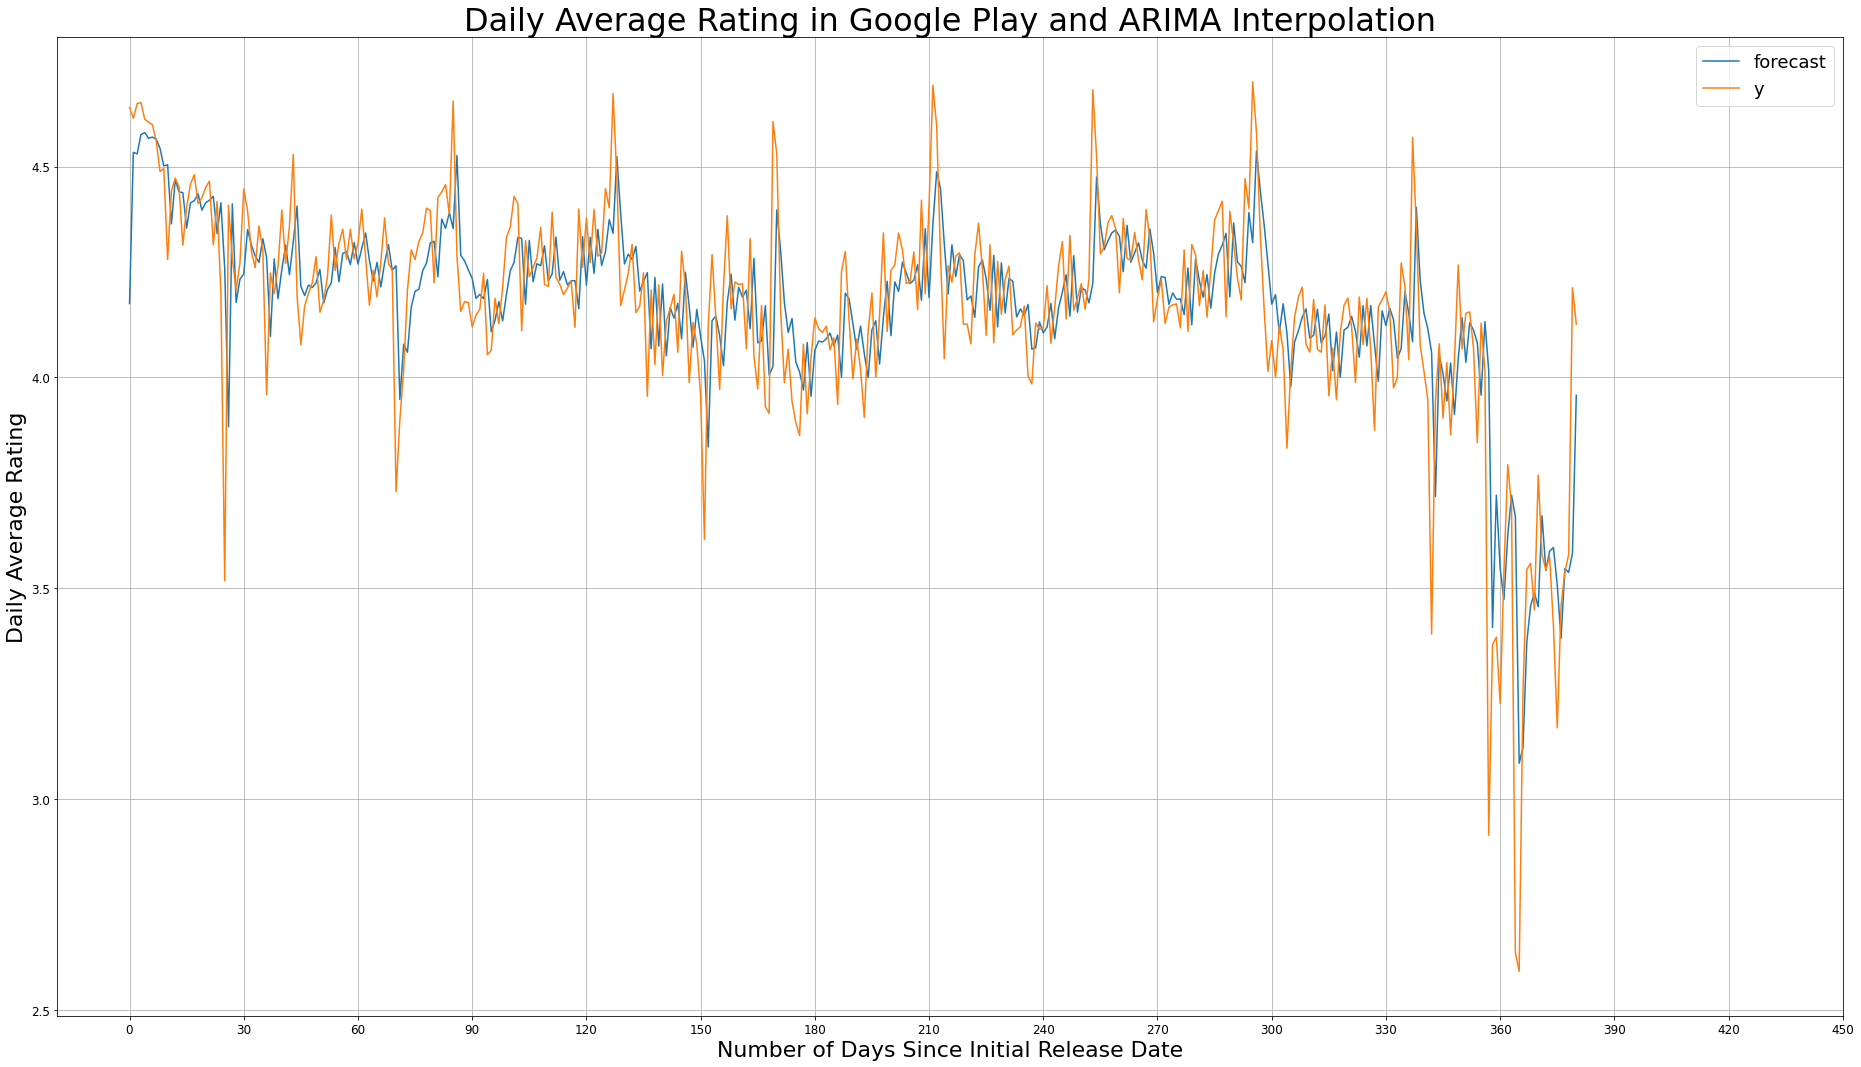

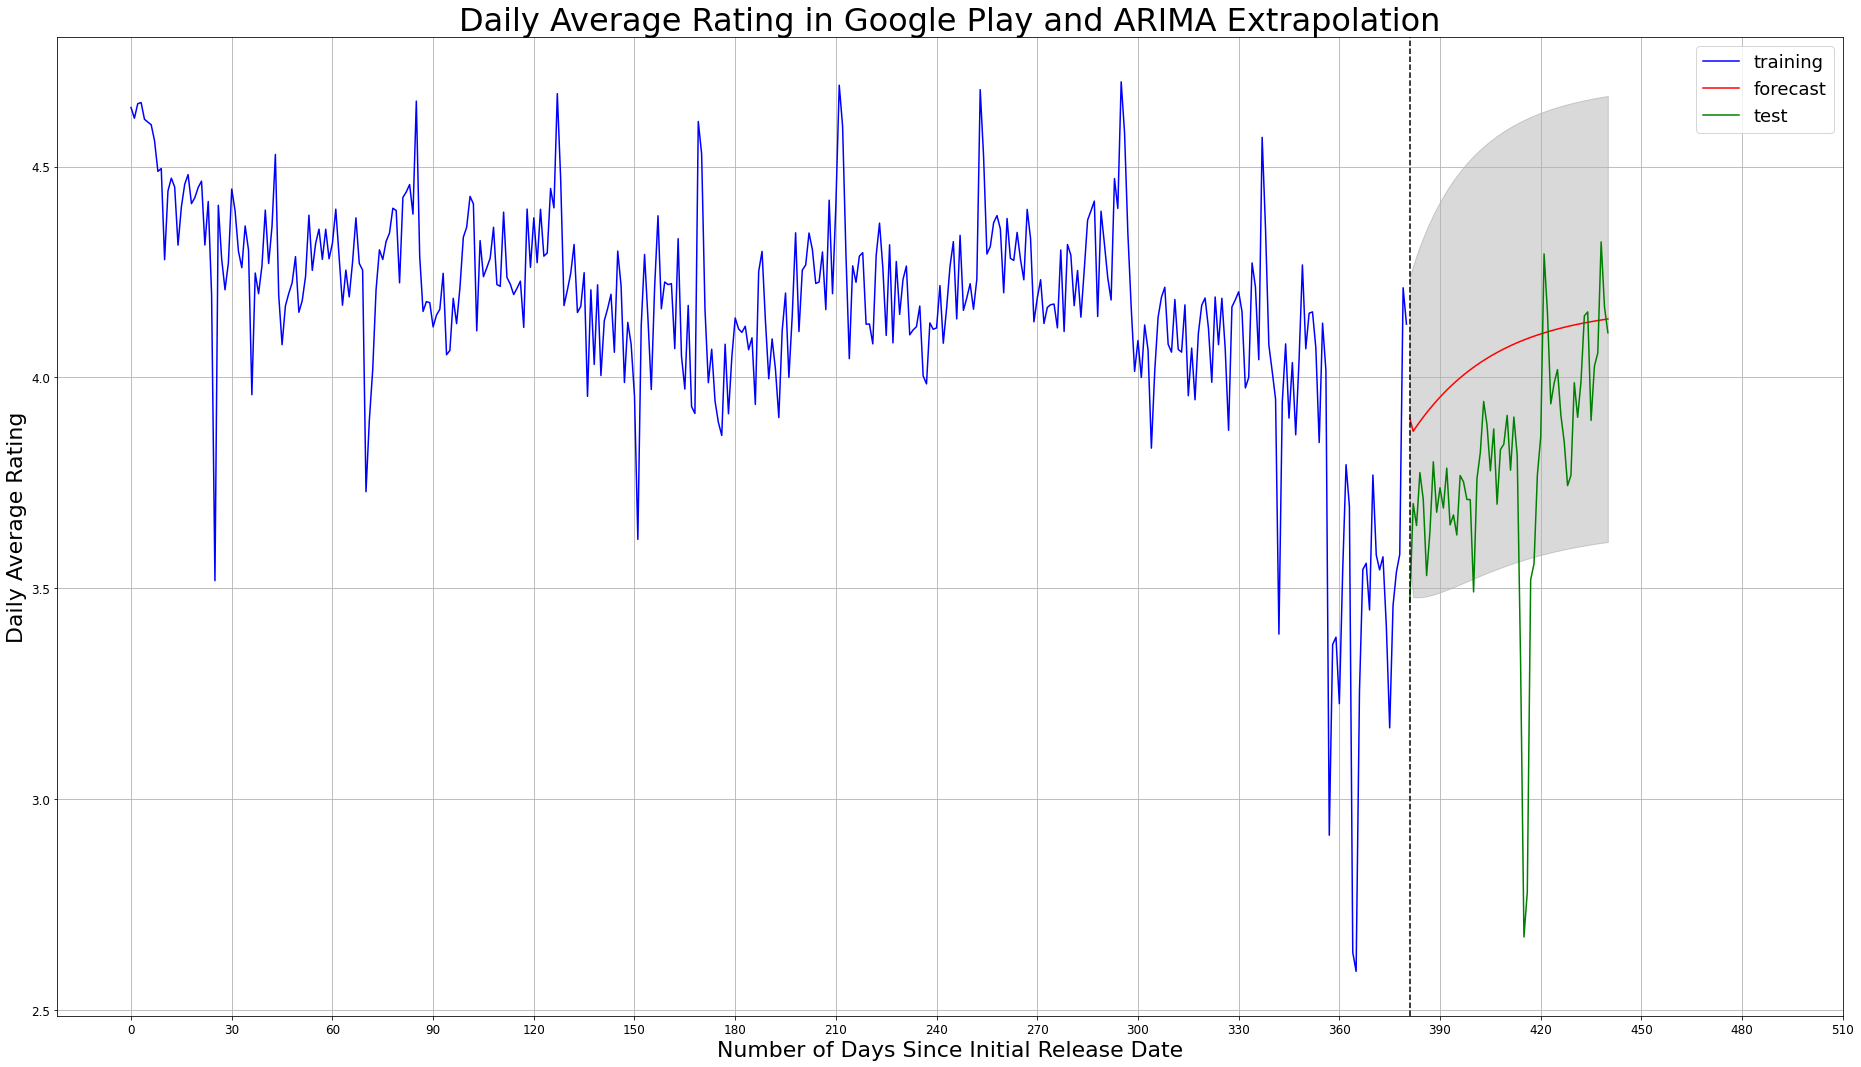

In [11]:
train_ARIMA(df_google_ratings, "Google Play")

## 4.  Gaussian Process

In [12]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import WhiteKernel, RBF, ExpSineSquared, DotProduct

In [13]:
def train_GP(df, name, kernel, training_dates, pred_days = 60):
    indexes = list(map(lambda x : str(x), df.index))
    ratings = np.array(df["grade"])
    training_indexes = [indexes.index(date) for date in training_dates]
    training_ratings = [ratings[indexes.index(date)] for date in training_dates]
    
    X_train = np.array(training_indexes)
    y_train = np.array(training_ratings)
    all_X = np.array(range(len(indexes)))
    true_X = np.array(range(len(indexes)))
    true_y = np.array(ratings)
    dates = list(df.index)
    
    gp = gaussian_process.GaussianProcessRegressor(kernel = kernel)
    gp.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
    print(gp.kernel_)
    
    mus, sigmas = gp.predict(all_X.reshape(-1, 1), return_std = True)
    
    plt.figure(figsize = (32, 18))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 30))
    plt.rcParams.update({'font.size': 12})
    
    plt.errorbar([dates[x] for x in all_X], mus, yerr = sigmas, capsize = 0, 
                 ecolor = (0.85, 0.85, 0.85), fmt = "r-", 
                 label = "pred mean")
    plt.plot([dates[x] for x in X_train], y_train, "ko", label = "training set")
    plt.plot([dates[x] for x in true_X], true_y, "b-", label = "truth function")
    plt.axvline(x = df.index[-1] - datetime.timedelta(days = pred_days), color = "black", linestyle = "--")
    
    plt.title("Daily Average Rating in " + name + " and Gaussian Process Prediction", fontsize = 32)
    plt.xlabel("Date", fontsize = 22)
    plt.ylabel("Daily Average Rating", fontsize = 22)
    plt.grid()
    plt.legend(fontsize = 18)
    
    print("MSE = ", mean_squared_error(np.squeeze(mus)[-pred_days:], true_y[-pred_days:]))

In [14]:
kernel = RBF(length_scale = 3) + ExpSineSquared(periodicity = 0.5) + DotProduct() + WhiteKernel()
training_dates = ["2020-09-28", "2020-10-08", "2020-10-20", "2020-10-30", 
                  "2020-11-11", "2020-11-21", "2020-12-01", "2020-12-11", 
                  "2020-12-23", "2021-01-02", "2021-01-12", "2021-01-22",
                  "2021-02-03", "2021-02-13", "2021-03-02", "2021-03-12", 
                  "2021-03-17", "2021-03-27", "2021-04-06", "2021-04-16", 
                  "2021-04-28", "2021-05-08", "2021-05-18", "2021-05-28",
                  "2021-06-09", "2021-06-19", "2021-06-29", "2021-07-09", 
                  "2021-07-21", "2021-07-31", "2021-08-10", "2021-08-20", 
                  "2021-09-01", "2021-09-11", "2021-09-21", "2021-10-01"]

### Bilibili Game Center

/Users/bill/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


RBF(length_scale=9.75) + ExpSineSquared(length_scale=1.95e+04, periodicity=0.501) + DotProduct(sigma_0=2.07) + WhiteKernel(noise_level=1e-05)
MSE =  1.243961984664722


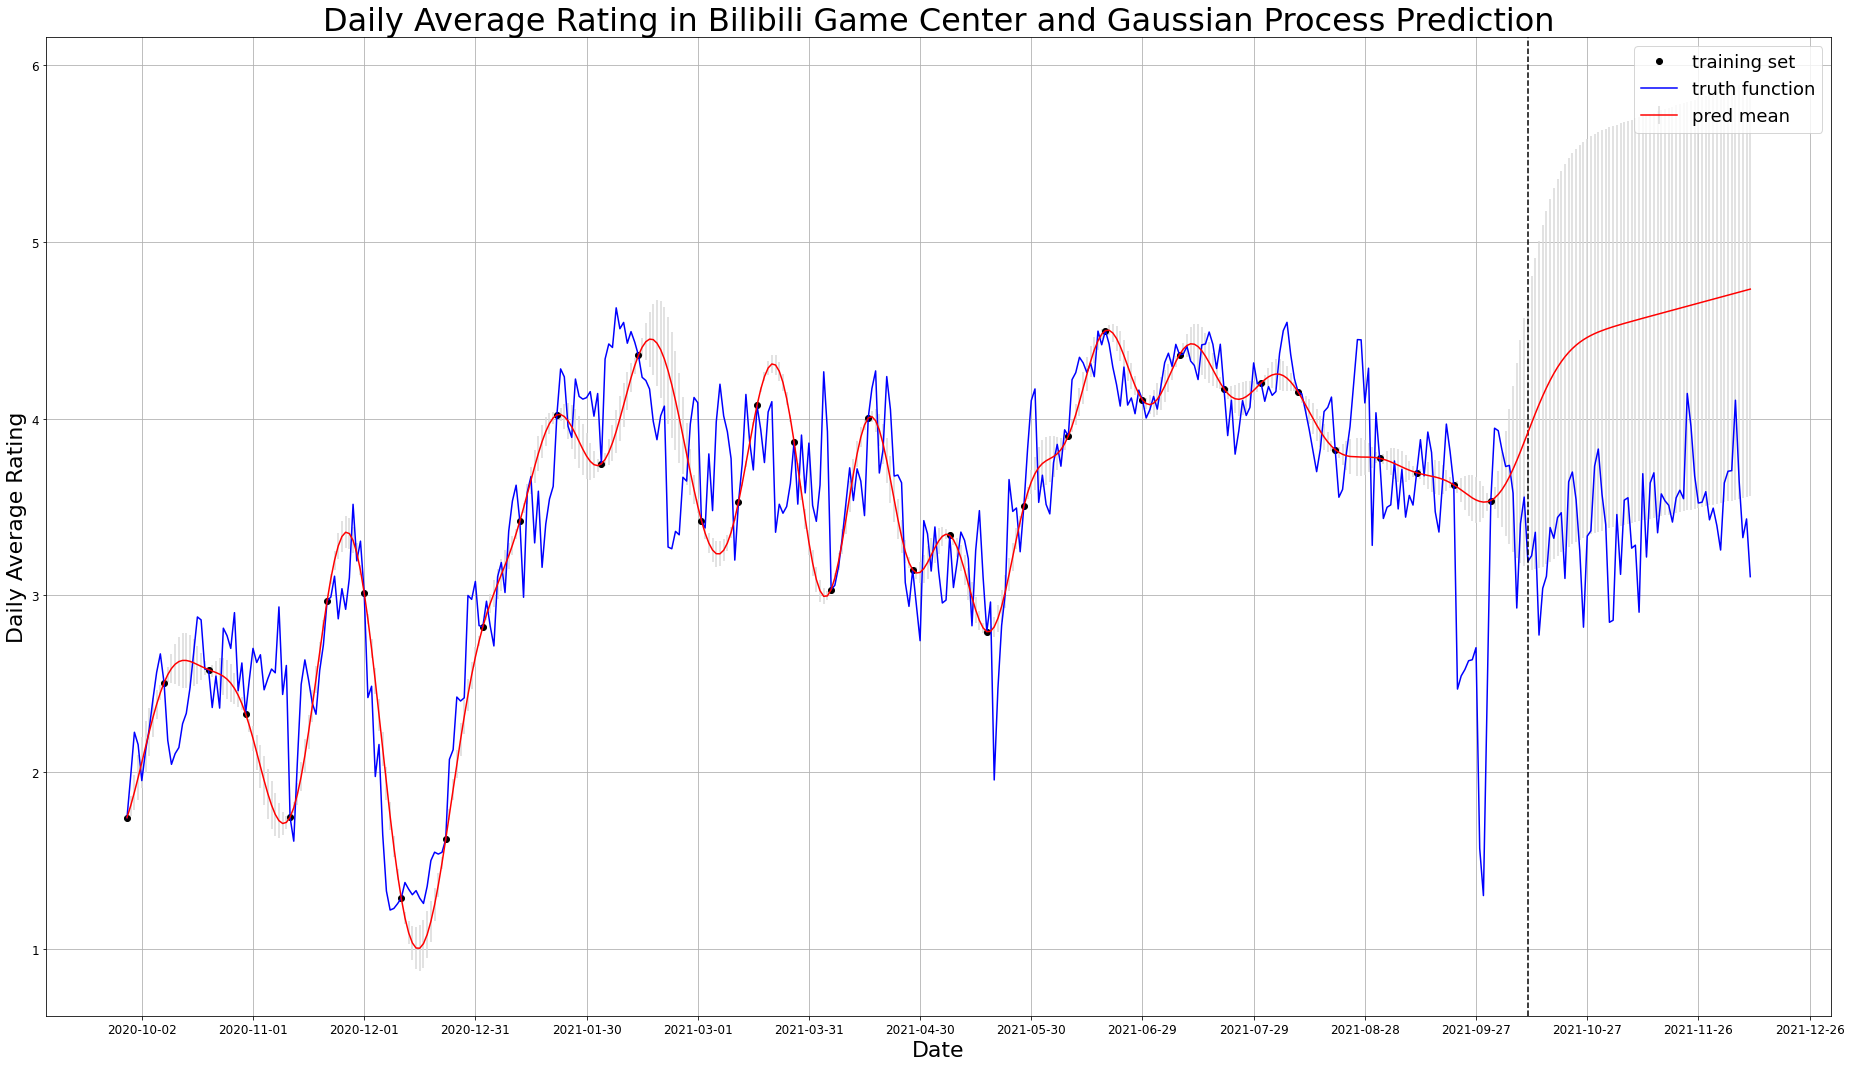

In [15]:
train_GP(df_bilibili_ratings, "Bilibili Game Center", kernel, training_dates)

### Google Play

RBF(length_scale=20) + ExpSineSquared(length_scale=1.13, periodicity=0.5) + DotProduct(sigma_0=4.32) + WhiteKernel(noise_level=0.0172)
MSE =  0.2628901625947922


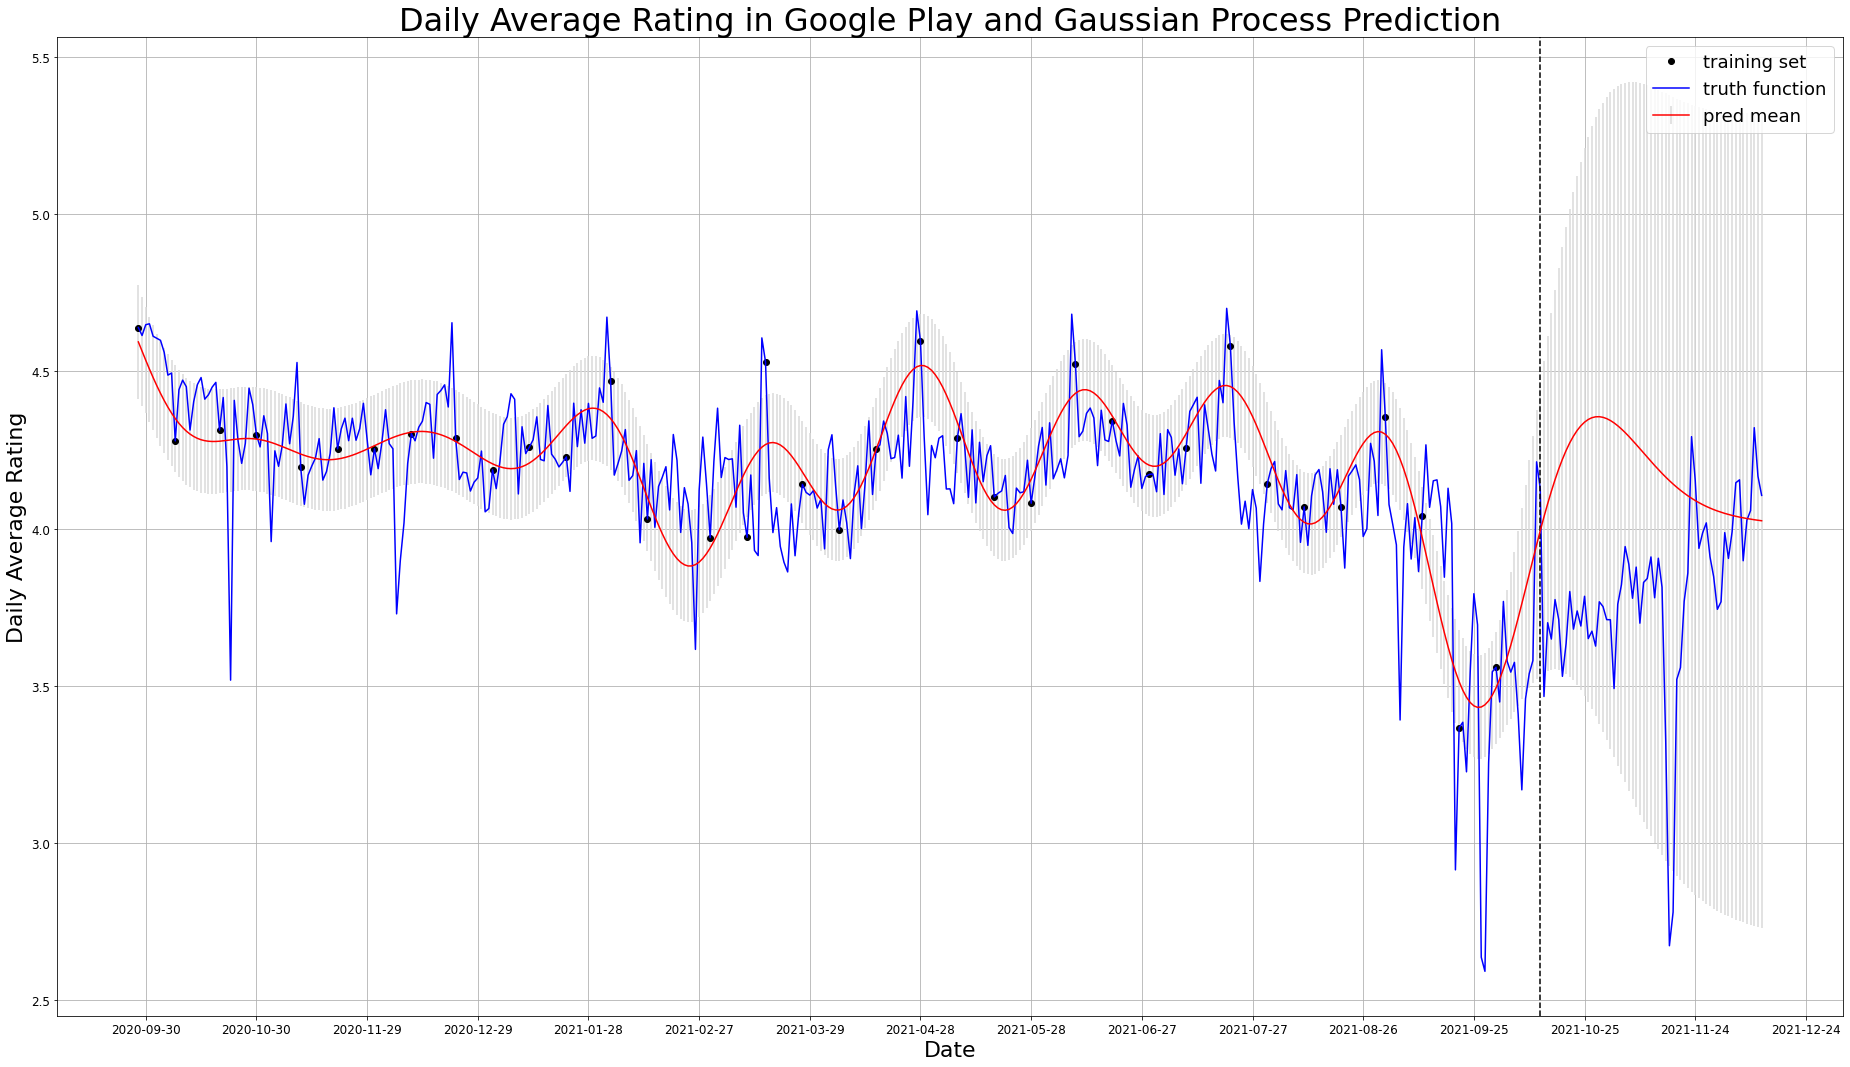

In [16]:
train_GP(df_google_ratings, "Google Play", kernel, training_dates)